**<h1>Group Project</h1>**

**<h1>Predicting diabetes in patients</h1>**
---

>

   **<h2>Group members</h2>**


*   Hranush Sahradyan
*   Hasmik Margaryan


>

**<h2>Purpose of the project</h2>**

Our goal is building a machine learning model that solves our classification task and accurately predict whether or not the patients in the dataset have diabetes or not?





**<h2>Dataset Overview</h2>**

The dataset used in this project is sourced from Kaggle.This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritag. Here is the [kaggle page](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) of the assignment.


**<h2>Dataset Description</h2>**

This dataset contains incidents derived from from the National Institute of Diabetes and Digestive and Kidney Diseases.

**Pregnancies:** This feature represents the number of times an individual has been pregnant. It's important as several studies have indicated that the risk of developing diabetes increases with the number of pregnancies.

**Glucose:** This represents the plasma glucose concentration a 2 hours in an oral glucose tolerance test. Elevated levels of glucose in the blood, or hyperglycemia, is a common effect of uncontrolled diabetes and over time leads to serious damage to many of the body's systems, especially the nerves and blood vessels.

**BloodPressure:** This feature signifies diastolic blood pressure (in mm Hg). Persistent high blood pressure, also known as hypertension, can lead to various health problems including heart disease, kidney disease, stroke, and can also be a risk factor for the development of diabetes.

**SkinThickness:** This refers to the triceps skin fold thickness (in mm). It's a measure of body fat, and higher values may indicate overweight or obesity, which are known risk factors for diabetes.

**Insulin:** This is the 2-Hour serum insulin (in mu U/ml). Insulin is a hormone that regulates blood sugar, and problems with insulin production or function can lead to the development of diabetes.

**BMI:** This feature is the Body Mass Index (weight in kg/(height in m)^2). Like skin thickness, it's a measure of body fat, and high BMI values (overweight or obesity) are associated with an increased risk of diabetes.

**DiabetesPedigreeFunction:** This is a function that scores likelihood of diabetes based on family history. It's based on the premise that the genetic predisposition to the disease can be quantified and that a family history of the disease increases the risk.

**Age:** This represents age in years. Aging is associated with changes in body composition, insulin secretion and action, and glucose metabolism, all of which can increase the risk of developing diabetes.

**Outcome:** This is the class variable (0 or 1). In this dataset, 268 of 768 instances are 1 (representing diabetes), and the rest are 0 (no diabetes). This is our target variable which we aim to predict based on the other features.



>
>
>
>
>
>
>
>
>
>
>
>
>
>
>


**<h2>Contents</h2>**


1.   [Data Cleaning and Preprocessing](#preproc)
3.   [EDA](#eda)

4.   [MODELS](#model)


>
>
>
>
>
>
>
>
>
>
>
>
>
>
>

<a name="preproc"></a>
# Data Cleaning and Preprocessing

### Import of libraries.

In [ ]:
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)

Reading dataset

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)



The dataset typically contains records of around 768 female Indians

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We can see there are nor missing or duplicated values in our dataset and no need of type conversions either.



In [ ]:
print(f'Duplicated values: {df.duplicated().sum()}')

Duplicated values: 0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Pregnancies:** The mean number of pregnancies is approximately 3.85, with a standard deviation of 3.37. The minimum value is 0, indicating women who haven't been pregnant, and the maximum is 17, representing the highest number of pregnancies in the dataset.

**Glucose:** The mean glucose level is around 120.89 mg/dL, with a standard deviation of 31.97. The minimum value of 0 seems incorrect since glucose levels cannot be zero. This might be missing data or an error in data collection.

**BloodPressure:** The mean blood pressure is approximately 69.11 mm Hg, with a standard deviation of 19.36. The minimum value of 0 seems incorrect as blood pressure cannot be zero. Similar to the glucose column, this could be missing data or measurement errors.

**SkinThickness:** The mean skin thickness is around 20.54 mm, with a standard deviation of 15.95. The minimum value of 0 also seems incorrect, as it is unlikely for someone to have zero skin thickness. This could be missing data or measurement errors.

**Insulin:** The mean insulin level is approximately 79.80 mu U/ml, with a standard deviation of 115.24. The minimum value of 0 seems incorrect since insulin levels cannot be zero. This could be missing data or measurement errors.

**BMI:** The mean BMI (Body Mass Index) is approximately 31.99 kg/m², with a standard deviation of 7.88. There are no obvious incorrect values in this column.

**DiabetesPedigreeFunction:** The mean diabetes pedigree function value is 0.47, with a standard deviation of 0.33. This column represents a numerical value related to family history of diabetes, and there are no obvious incorrect values.

**Age:** The mean age is around 33.24 years, with a standard deviation of 11.76. The minimum age is 21, and the maximum age is 81, indicating the age range of the patients in the dataset.

Outcome: This column represents the target variable, where 0 indicates no diabetes and 1 indicates diabetes. The mean of 0.35 suggests that the dataset is slightly imbalanced, with slightly more non-diabetic cases.

It is important to note that some of the minimum values in the features are 0 such as glucose, blood pressure, skin thickness, and insulin seem incorrect. These values might indicate missing data or measurement errors. Let's further explore that incorrect values.

In [ ]:
zero_counts = {
    'Glucose': df[df['Glucose'] == 0]['Glucose'].count(),
    'BloodPressure': df[df['BloodPressure'] == 0]['BloodPressure'].count(),
    'SkinThickness': df[df['SkinThickness'] == 0]['SkinThickness'].count(),
    'Insulin': df[df['Insulin'] == 0]['Insulin'].count()
}

zero_counts_df = pd.DataFrame.from_dict(zero_counts, orient='index', columns=['Zero Count'])
zero_counts_df

,Zero Count
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374



Since the incrorrect values are more than expected we decided to not remove them but replace with na than handle missing values of each variable seperately.

In [ ]:
df[['Insulin','SkinThickness','Glucose','BloodPressure','BMI']] = df[['Insulin','SkinThickness','Glucose','BloodPressure','BMI']].replace(0,np.NaN)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

After replacing zero values with null, missing values can be handle through mean, median or other methods.Now  let's understand which one we can use.

In [ ]:
fig = make_subplots(rows=2, cols=4, subplot_titles=('<b>Distribution of Pregnancies</b>',
                                                    '<b>Distribution of Glucose</b>',
                                                    '<b>Distribution of Blood Pressure</b>',
                                                    '<b>Distribution of Skin Thickness</b>',
                                                    '<b>Distribution of Insulin</b>',
                                                    '<b>Distribution of BMI</b>',
                                                    '<b>Distribution of Diabetes Pedigree Func.</b>',
                                                    '<b>Distribution of Age</b>'
                                                   ))

fig.add_trace(go.Histogram(x=df['Pregnancies']), row=1, col=1)
fig.add_trace(go.Histogram(x=df['Glucose']), row=1, col=2)
fig.add_trace(go.Histogram(x=df['BloodPressure']), row=1, col=3)
fig.add_trace(go.Histogram(x=df['SkinThickness']), row=1, col=4)
fig.add_trace(go.Histogram(x=df['Insulin']), row=2, col=1)
fig.add_trace(go.Histogram(x=df['BMI']), row=2, col=2)
fig.add_trace(go.Histogram(x=df['DiabetesPedigreeFunction']), row=2, col=3)
fig.add_trace(go.Histogram(x=df['Age']), row=2, col=4)


# Update visual layout
fig.update_layout(
    showlegend=False,
    width=1200,
    height=400,
    autosize=False,
    margin=dict(t=15, b=0, l=5, r=5),
    template="simple_white",
)

fig.update_coloraxes(colorbar_tickfont_size=10)
fig.update_annotations(font_size=10)
fig.update_traces(opacity=0.75)

fig.show()

 The distribution of Pregnancies is skewed to the left, quite similar to the distribution of age, so it is possible that this dataset mainly takes data from people of reproductive age (19 - 40).
Glucose,BloodPressure have the distribution closest to the normal distribution. BMI is left and the remaining variables are also distributed skewed to the left.
So let's
* Fill with median missing values in SkinThickness, Insulin and BMI
* Fill with mean missing values in Glucose and BloodPresure

In [ ]:
# Fill missing values with median
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)

# Fill missing values with mean
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Everything is fine with missing values, now let's look at target variable.

In [ ]:
unique_values = df['Outcome'].unique()
print(unique_values)
Diabetic = df[df['Outcome'] == 1]  # Diabetic cases
Healthy = df[df['Outcome'] == 0]  # Healthy cases

[1 0]


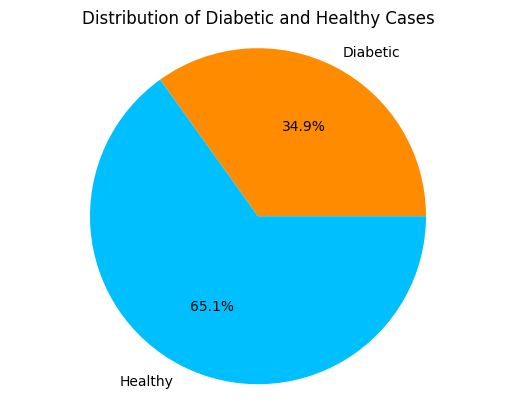

In [ ]:
diabetic_count = Diabetic.shape[0]
healthy_count = Healthy.shape[0]

# Plot the distribution
labels = ['Diabetic', 'Healthy']
sizes = [diabetic_count, healthy_count]
colors = ['#FF8C00', '#00BFFF']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Diabetic and Healthy Cases')
plt.show()

There is only 0 and 1 values in target variable so there is no incorectness, and we also can see that Outcome is imbalanced, there are more observations about healthy patients.

<a name="eda"></a>
# EDA

We have already done some EDA but let's see more visualisations that can help us in feature selection process.

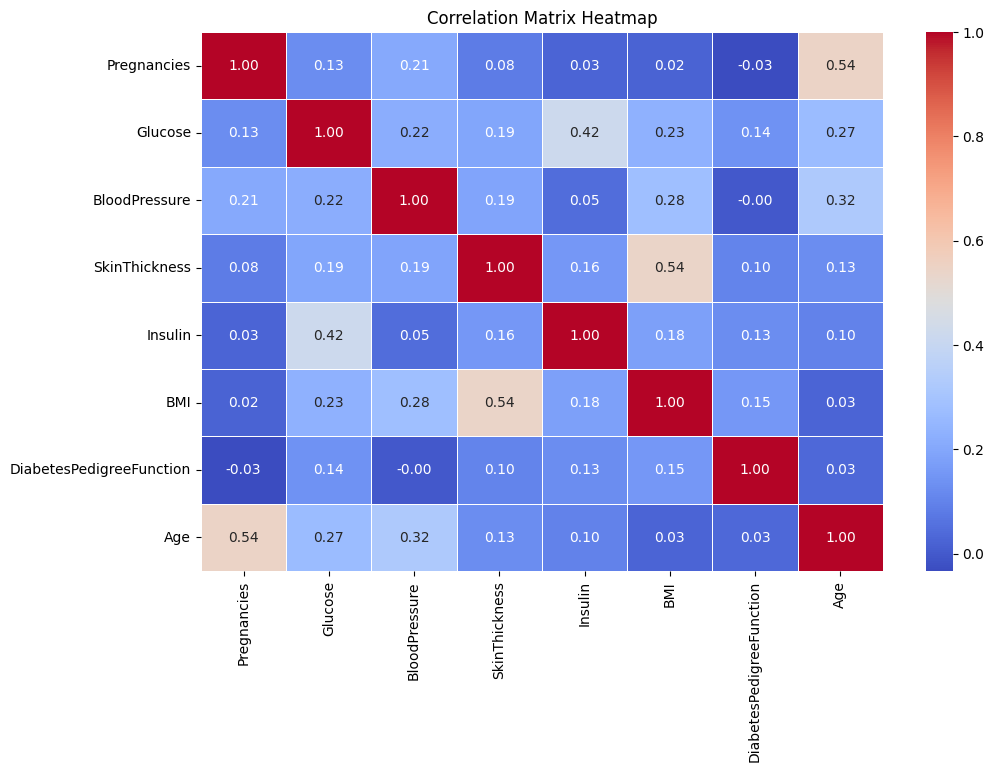

In [ ]:
d = df.drop(['Outcome'], axis=1)

correlation_matrix = d.corr()

plt.figure(figsize=(11, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

There is high correletion cofficient between Age and Pregnancies  then between Insulin and Glucose features. And let's see correlation between target variable and features.

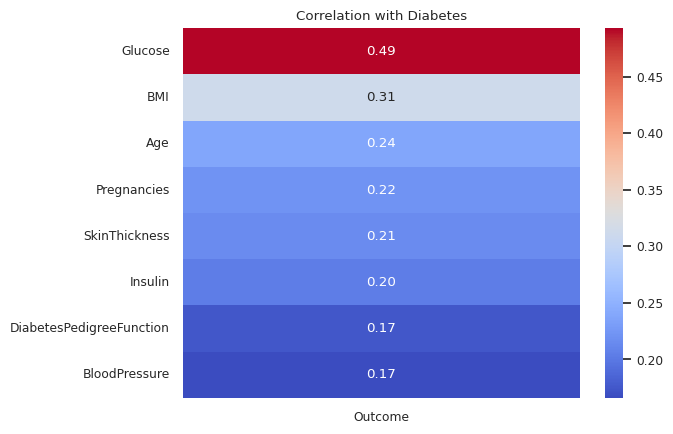

In [ ]:
corr = df.corr()
target_corr = corr['Outcome'].drop('Outcome')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

We see that target is more correlated with Glucose and BMI.



In [ ]:
d = df.drop(['Outcome'], axis=1)
fig = px.box(d, y=d.columns,color=df['Outcome'],title='Boxplots for Feature Outliers',labels={'variable': 'Features', 'value': 'Values'})

fig.show()

Here we can see for patients who has diabet the features values medean and interquartile range(50% of the data) differs, such as in variables Glucose, Insulin, Skinthickness but not for DiabetsPredigreeFunction values.

Here what says [National Library of Medicine](https://www.ncbi.nlm.nih.gov/books/NBK532915/) about Glucose levels:

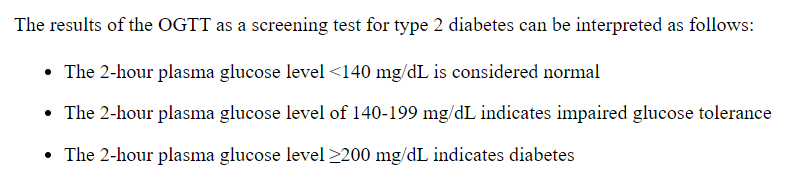

In [ ]:
fig = px.scatter(df, x='Glucose', y='Outcome', color='Glucose',
                 labels={'Glucose': 'Glucose Level', 'Outcome': 'Outcome'},
                 title='Glucose Level vs. Outcome')
fig.update_layout(showlegend=False)
fig.show()

From plot above we understand that glucose levels alone may not be a definitive indicator of diabetes. While high glucose levels are commonly associated with diabetes, they can also occur in non-diabetic individuals due to various factors such as diet, stress, and other medical conditions.

Here are some other plots to see the relationship betwenn features.

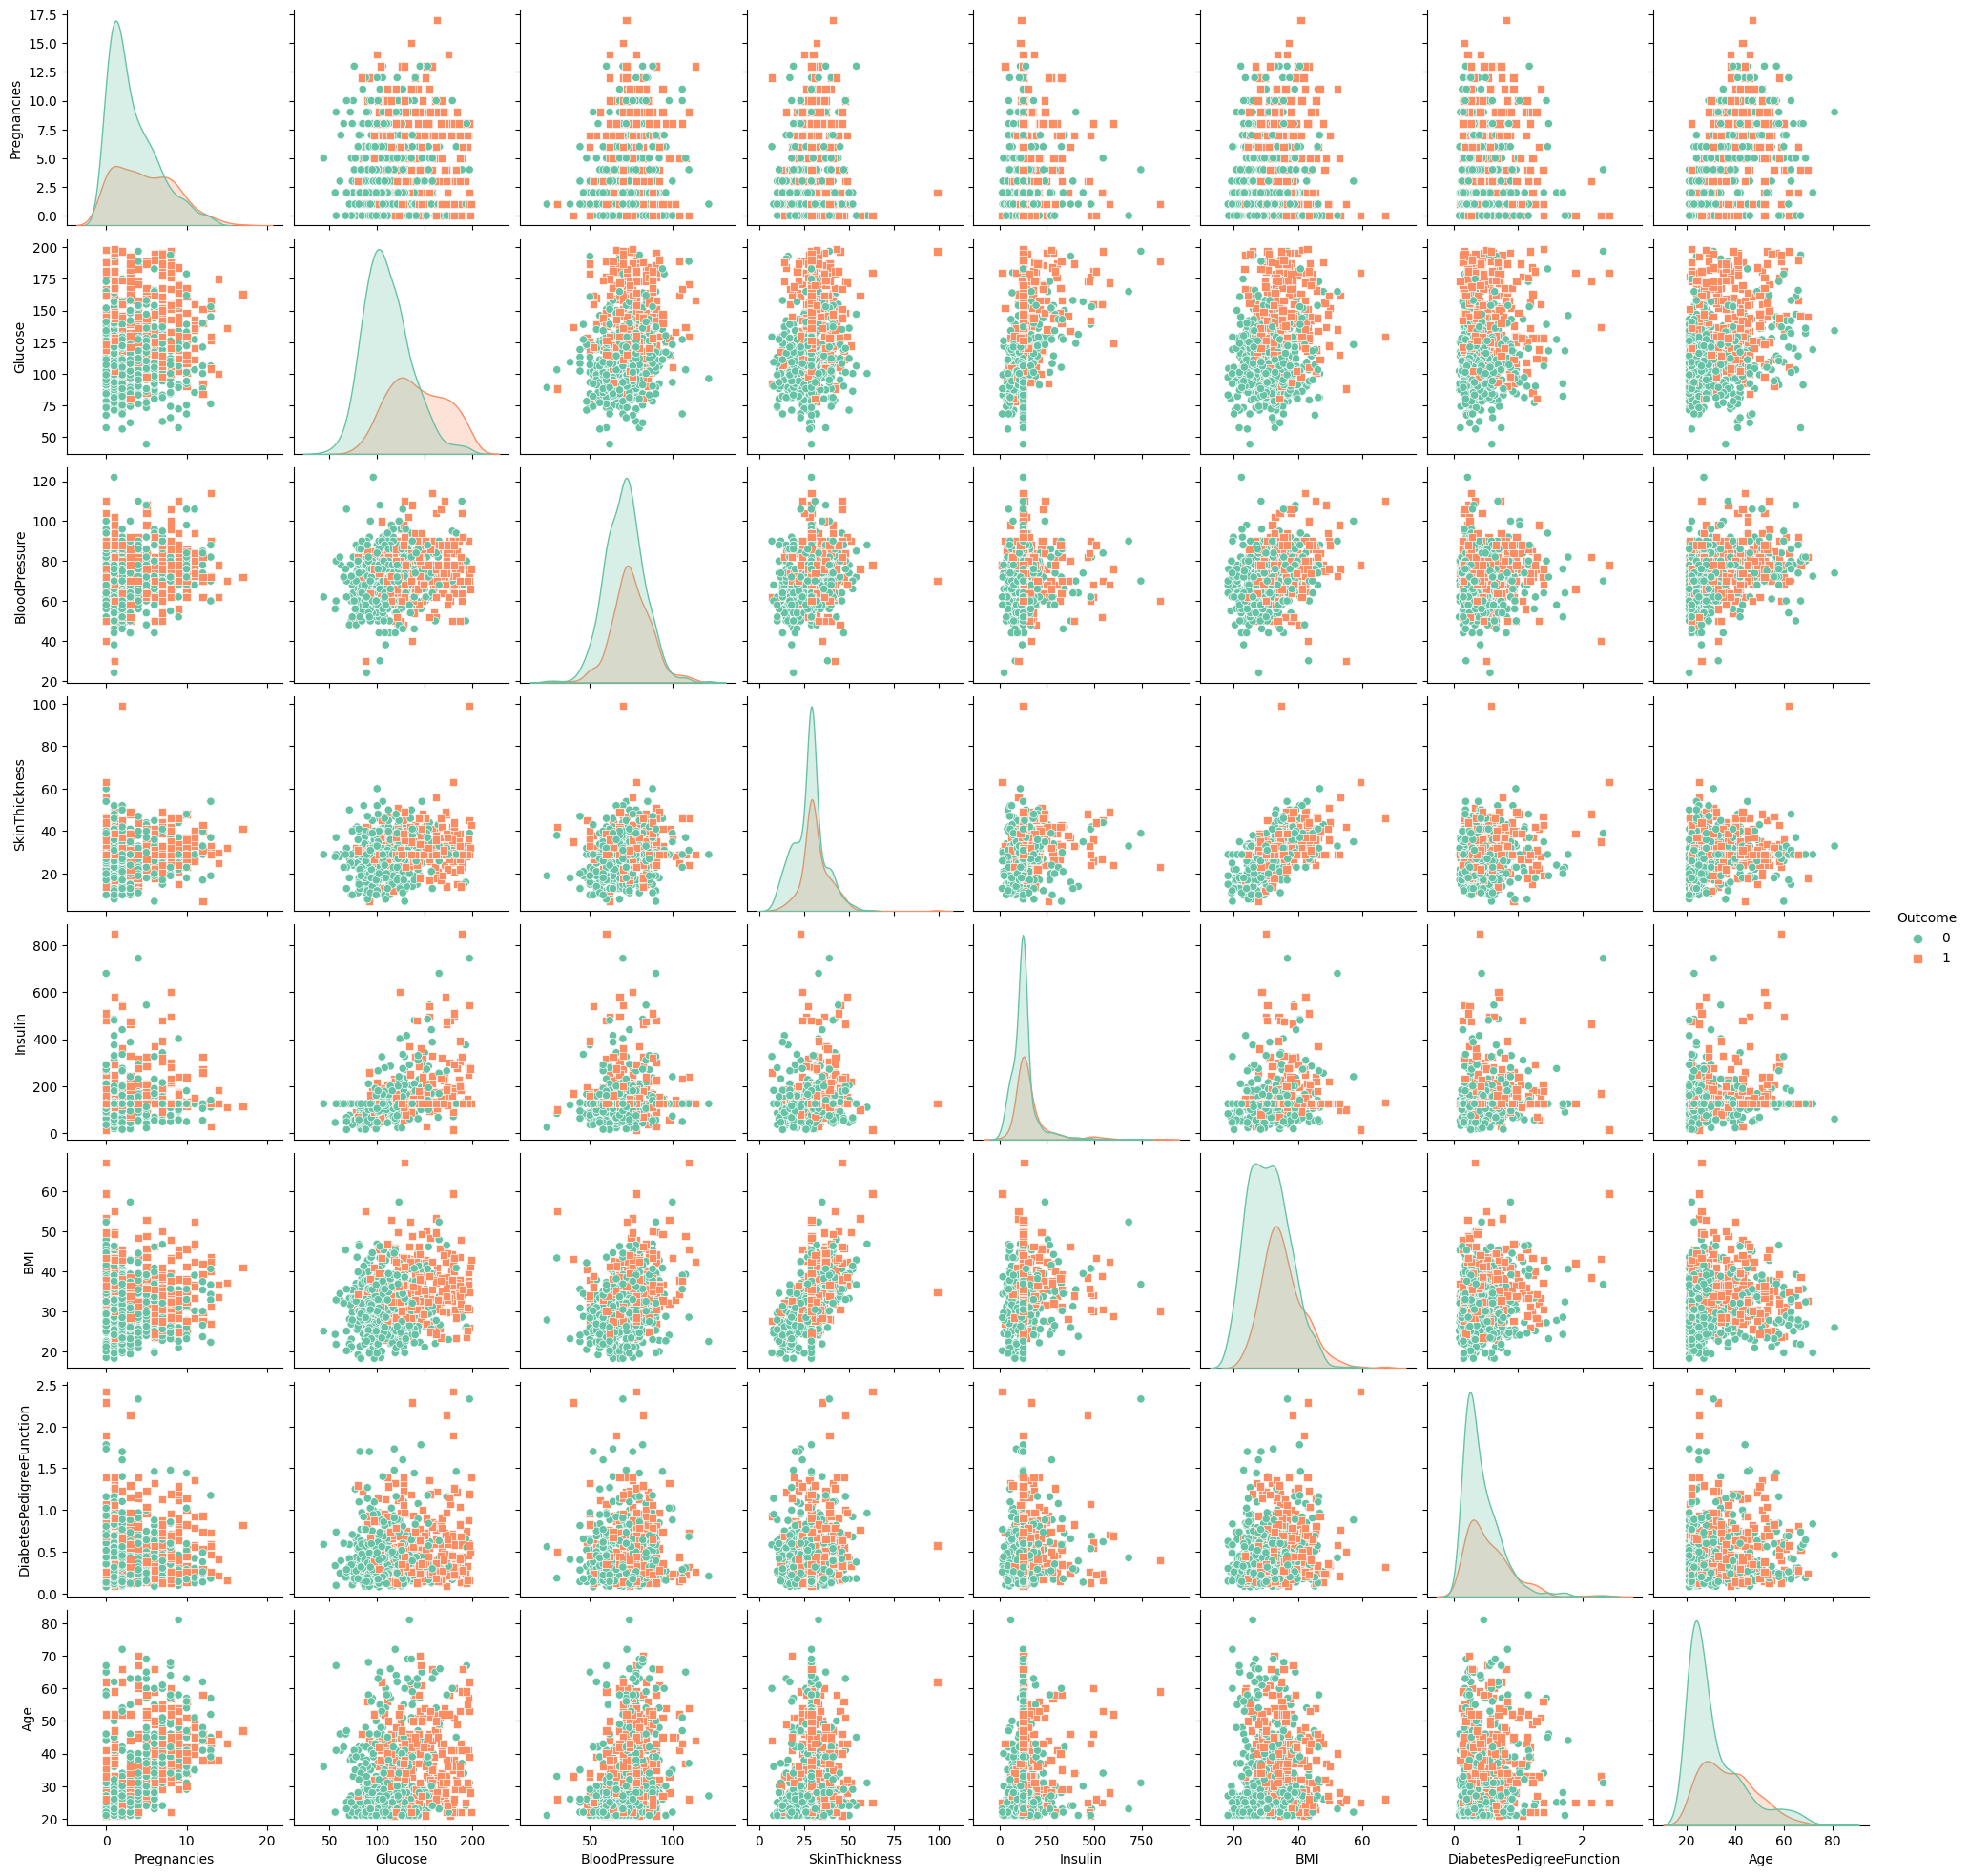

<Figure size 900x600 with 0 Axes>

In [ ]:
sns.pairplot(df, hue='Outcome', markers=["o", "s"], palette="Set2")
plt.figure(figsize=(9, 6))
plt.show()


<a name="model"></a>
# Models


Let's start with train/test spliting.

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [ ]:
y_train.value_counts()

0    392
1    222
Name: Outcome, dtype: int64

In [ ]:
y_test.value_counts()

0    108
1     46
Name: Outcome, dtype: int64

#### Logistic Regression

We can afford to do a grid search with many parameters because the data is not very large.
Let's start with simple models.

In [ ]:
logreg = LogisticRegression()

param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(logreg, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best validation score:", grid_search.best_score_)



Best hyperparameters: {'C': 10.0, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best validation score: 0.7719712115153938


#### SVM

Let's try more complex and strong classifiers.

In [ ]:
svm = SVC()

param_grid = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf', 'poly']}

grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best validation score:", grid_search.best_score_)

Best hyperparameters: {'C': 10.0, 'kernel': 'poly'}
Best validation score: 0.7670931627349059


#### AdaBoost

We also tried ensemble methods (boosting and bagging) algorithms.

In [ ]:
adaboost = AdaBoostClassifier()

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.001,0.01,0.1, 0.5]
}

grid_search = GridSearchCV(adaboost, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best validation score:", grid_search.best_score_)


Best hyperparameters: {'learning_rate': 0.5, 'n_estimators': 200}
Best validation score: 0.7573770491803279


#### Random Forest

In [ ]:
random_forest = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(random_forest, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best validation score:", grid_search.best_score_)


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best validation score: 0.783326669332267


#### Gradient Boosting

In [ ]:
gradient_boosting = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(gradient_boosting, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best validation score:", grid_search.best_score_)


Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Best validation score: 0.7751699320271891


In [ ]:
data = {
    'Model': ['Logistic', 'SVM', 'AdaBoost', 'RandomForest', 'GradientBoosting'],
    'Validation Score': [77.2, 76.7, 75.7, 78.3, 77.5]
}

df = pd.DataFrame(data)
print(df)

              Model  Validation Score
0          Logistic              77.2
1               SVM              76.7
2          AdaBoost              75.7
3      RandomForest              78.3
4  GradientBoosting              77.5


## Best Model

In [ ]:
model=RandomForestClassifier(n_estimators=300,max_depth=None,min_samples_leaf=2,min_samples_split=5)
model.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300)

The Random Forest model was selected as the best model based on the highest validation score
obtained during the grid search process. The model demonstrated strong performance on the test
dataset, achieving an accuracy of 0.73. The precision, recall, and F1-score for each class are as follows:

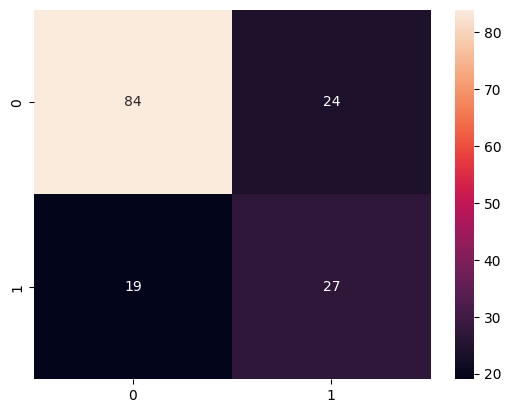

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       108
           1       0.53      0.59      0.56        46

    accuracy                           0.72       154
   macro avg       0.67      0.68      0.68       154
weighted avg       0.73      0.72      0.72       154



In [ ]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()
print(classification_report(y_test, y_pred))

The model demonstrated higher precision for class 0, indicating a higher ability to correctly
identify non-diabetic individuals. However, the recall and F1-score for class 1 were relatively lower,
suggesting that the model had more difficulty in correctly identifying diabetic cases.

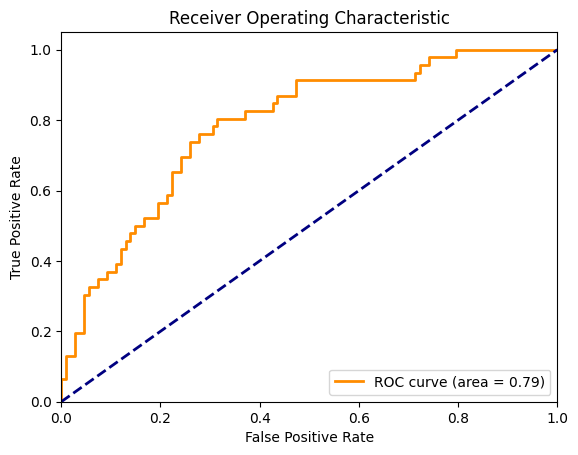

In [ ]:
y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

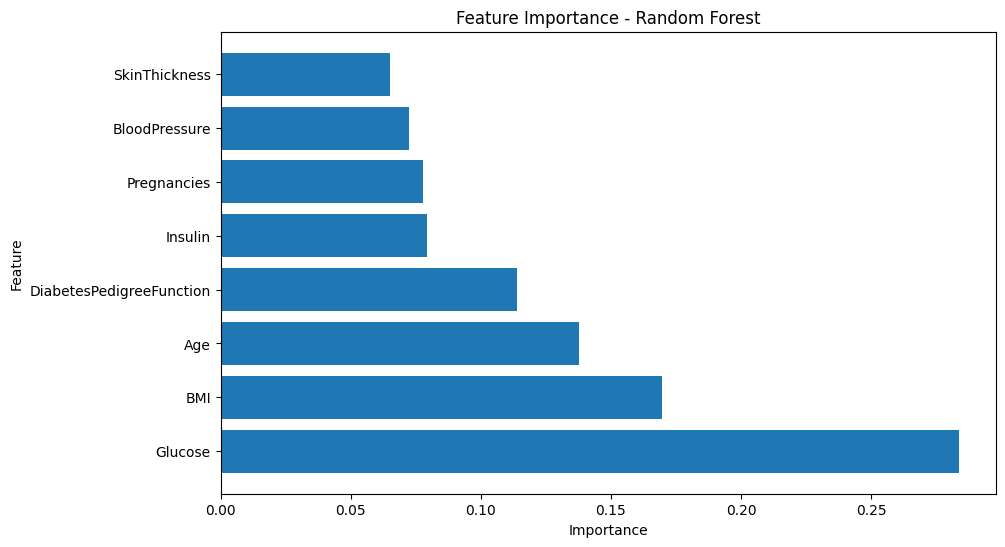

In [ ]:
feature_importance = model.feature_importances_

feature_names = df.drop('Outcome', axis=1).columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest')
plt.show()

Here we see feature importance scores where the most influential features for the overall model performance are Glucose, BMI and Age.

#### Future work

Based on the comprehensive evaluation of various machine learning models, the Random Forest
model was selected as the best-performing model for the task of predicting diabetes. It achieved
the highest validation score during the grid search process and demonstrated satisfactory performance on the test dataset. The model exhibited promising precision for non-diabetic cases and
reasonable overall accuracy. However, further improvements are required to enhance the model’s
ability to correctly identify individuals with diabetes, as reflected in the relatively lower recall and
F1-score for class 1.
